NB:  At the time of saving, this NB only worked as a Google colab NB, because there seemed to be problems with the Python graphviz version in the 3.7.6 Python instsallation on my local machine, and conda couldnt be made to install graphviz in my Python 3.8.6 installation because of numerous pacvkage conflicts.

This is a duplicate of a version on my Google drive and is being saved locally merely to have a local copy.

## Cayley tables usinggraphviz


See [python graphviz module docs](https://graphviz.readthedocs.io/en/stable/manual.html).

Currently this (5/10/21) does not work in the conda 3.8.5 system,
because conda couldn't successfully install graphviz (numerous
conflicts!).  This should clear itself up if graphviz is being properly
maintained.

The graph below is the Python graphviz translation of the following `.dot` file.

```
graph G {
size = "5,5!";
fontsize=6;
/* Render with twopi, sfdp or circo to capture the group symmetry */
label = "Cayley Diagram for Klein Group";
node [shape="none" width=.3 height=.3 fixedsize="true"];
e -- f  [style= "dotted"];
e -- h  [style = "dashed"];
e -- g  ;
f -- g [style="dashed"];
g -- h [style="dotted"];
h -- f;
}
```

### Definition of Klein group Cayley Diagram

We define the graph with some graph and node attribute commands, followed by a few edge commands.

We use the "twopi" engine because it does a very nice job of capturing the symmetry.

In [1]:
import pygraphviz

In [3]:
#dir(pygraphviz.graphviz)
dir(pygraphviz.graphviz)

['AGEDGE',
 'AGINEDGE',
 'AGNODE',
 'AGOUTEDGE',
 'AGRAPH',
 'Agdirected',
 'Agstrictdirected',
 'Agstrictundirected',
 'Agundirected',
 '_SwigNonDynamicMeta',
 '__builtin__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_graphviz',
 '_swig_add_metaclass',
 '_swig_python_version_info',
 '_swig_repr',
 '_swig_setattr_nondynamic_class_variable',
 '_swig_setattr_nondynamic_instance_variable',
 'agattr',
 'agattr_label',
 'agattrdefval',
 'agattrname',
 'agattrsym',
 'agclose',
 'agdegree',
 'agdeledge',
 'agdelnode',
 'agdelsubg',
 'agedge',
 'agfstedge',
 'agfstin',
 'agfstnode',
 'agfstout',
 'agfstsubg',
 'agget',
 'aghead',
 'agidedge',
 'agidnode',
 'agisdirected',
 'agisstrict',
 'agisundirected',
 'aglstnode',
 'agnameof',
 'agnedges',
 'agnnodes',
 'agnode',
 'agnxtattr',
 'agnxtedge',
 'agnxtin',
 'agnxtnode',
 'agnxtout',
 'agnxtsubg',
 'agopen',
 'agparent',
 'agprvnode',
 'agraphnew',
 'agraphof',
 'agread'

In [10]:
print(Graph.__doc__)

Class for Graphviz agraph type.

    Example use

    >>> import pygraphviz as pgv
    >>> G = pgv.AGraph()
    >>> G = pgv.AGraph(directed=True)
    >>> G = pgv.AGraph("file.dot")  # doctest: +SKIP

    Graphviz graph keyword parameters are processed so you may add
    them like

    >>> G = pgv.AGraph(landscape="true", ranksep="0.1")

    or alternatively

    >>> G = pgv.AGraph()
    >>> G.graph_attr.update(landscape="true", ranksep="0.1")

    and

    >>> G.node_attr.update(color="red")
    >>> G.edge_attr.update(len="2.0", color="blue")

    See http://www.graphviz.org/doc/info/attrs.html
    for a list of attributes.

    Keyword parameters:

    thing is a generic input type (filename, string, handle to pointer,
    dictionary of dictionaries).  An attempt is made to automaticaly
    detect the type so you may write for example:

    >>> d = {"1": {"2": None}, "2": {"1": None, "3": None}, "3": {"2": None}}
    >>> A = pgv.AGraph(d)
    >>> s = A.to_string()
    >>> B = pgv.AGra

In [8]:
Graph

0

In [12]:
from pygraphviz import Graph
#from pygraphviz.graphviz import Agdirected as Graph

g = Graph('G', filename='../images/klein_group.gv', engine='twopi', format='png',
          graph_attr=dict(label="Cayley Diagram for Klein Group",
                          size = "5,5!",
                           fontsize="10"),
          node_attr = dict(shape="none",
                           width=".3", height=".3",
                           labelfontsize="4",
                           fixedsize="true")
          )
g.edge('e', 'f',style="dotted")
g.edge('e', 'h',style="dashed")
g.edge('e', 'g')
g.edge('f', 'g',style="dashed")
g.edge('g', 'h',style="dotted")
g.edge('h', 'f')
#g.view()
g

ImportError: cannot import name 'Graph' from 'pygraphviz' (/Users/gawron/opt/anaconda3/envs/p310/lib/python3.10/site-packages/pygraphviz/__init__.py)

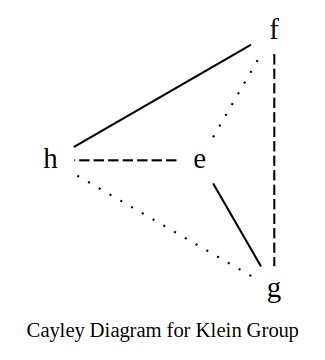

In [ ]:
from graphviz import Graph

g = Graph('G', filename='klein_group.gv', engine='twopi', format='png',
          graph_attr=dict(label="Cayley Diagram for Klein Group",
                          size = "5,5!",
                           fontsize="10"),
          node_attr = dict(shape="none",
                           width=".3", height=".3",
                           labelfontsize="4",
                           fixedsize="true")
          )
g.edge('e', 'f',style="dotted")
g.edge('e', 'h',style="dashed")
g.edge('e', 'g')
g.edge('f', 'g',style="dashed")
g.edge('g', 'h',style="dotted")
g.edge('h', 'f')
#g.view()
g

To interpret the Cayley diagram, first note the edge styles from `e`; each edge style consistently represents a particular multiplication operation. Let's say it is always right multiplication.  So the dotted line from `e` to `f` must represent right multiplication by `f`.  

$$e \circ f = f$$

Hence the dotted line between `h` and `g` must also represent right multiplication by `f`.  

$$h \circ f = g$$

The fact that the graph edges have no arrows means this is an Abelian group.
Hence the last two edges also represent the following facts:

$$
\begin{array}[t]{l}
f \circ e = f\\
f \circ h = g
\end{array}
$$

Similarly, we can establish the dashed lines represent multiplication
with $h$, and the solid lines represent multiplication with $g$.  Given
all this, the diagram completely determines the operation table of the
Klein Group.

$$
\begin{array}[t]{l|ccccc}
   & e & f & g  & h\\
   \hline
e  & e & f & g  & h\\
f  & f & e & h & g \\
g  & g & h & e & f \\
h &  h & g  & f  & e
\end{array}
$$

You should take some time to convince yourself the diagram
and the table represent the same information.

## Using sfdp engine

In [ ]:
g.engine='sfdp'

In one implementation, the sfdp engine emits a warning about overlapping edges
when it builds this, since the diagonal edges cross.
On the commandline, this can be safely ignored.  But
in the python wrapper, this is is causing an error 
I dont know how to fix.

In the Google colab notebook version, this has gone away.

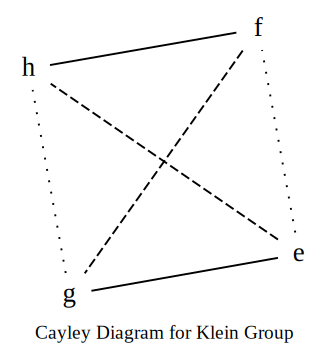

In [ ]:
#size attribute ignored
g

It is worth convincing yourself that nothing but the layout has changed.  The same operation table is being captured.  The dashed, dotted, and
solid line styles still mean the same thing.

Nevertheless the two different diagrams highlight different aspects
of the group.  This rendering makes it much more obvious that which vertex you
choose as `e` is completely arbitrary.  Choose any vertex to be `e`.  Relabel the other edges consistent with that choice (reinterpret the line styles consistent with that choice), and the same operation table is represented.


## All the engines

circo


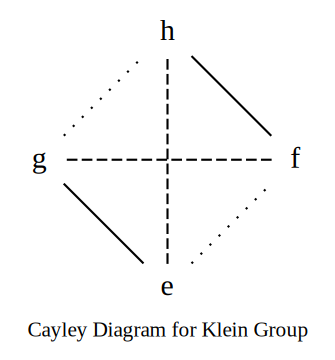


dot


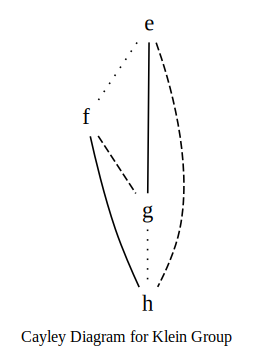


fdp


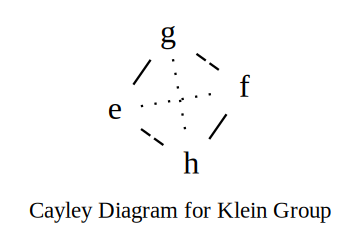


neato


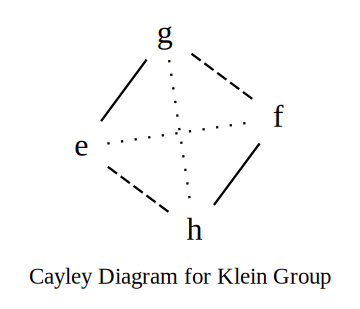


osage


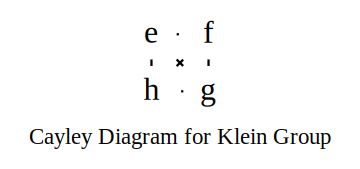


patchwork


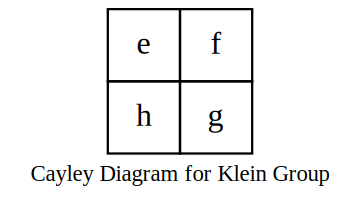


sfdp


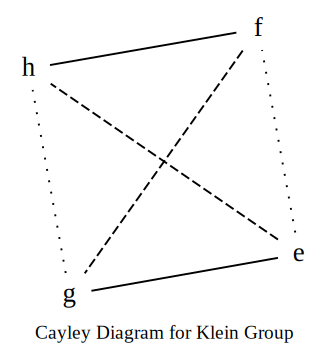


twopi


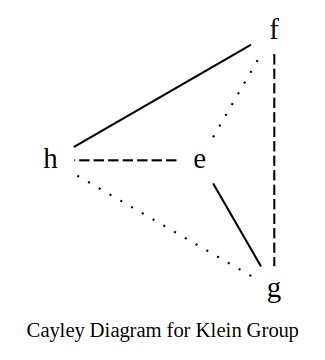

In [ ]:
import graphviz
for engine in sorted(graphviz.ENGINES):
    print(engine)
    g.engine = engine
    display(g)
    print()

## The ${\mathbf Z6}$ Group

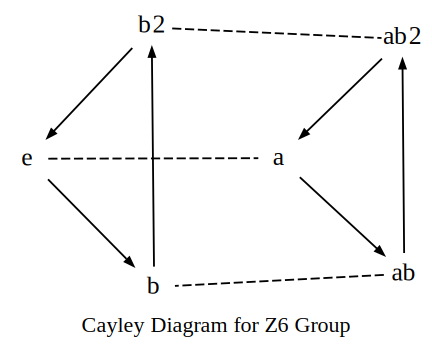

In [ ]:
from graphviz import Digraph

# g = Digraph('G', filename='z6_group.gv', engine='sfdp', format='png',
#           graph_attr=dict(label="Cayley Diagram for Z6 Group",
#                           size = "6,6!",
#                            fontsize="12"),
#           node_attr = dict(shape="none",
#                            width=".3", height=".3",
#                            labelfontsize="3",
#                            fixedsize="true"),
#           edge_attr = dict(arrowhead="vee",arrowtail="vee")
#           )
# g.node('e',label='<e>')
# g.node('b',label='<b>')
# g.node('a',label='<a>')
# g.node('b2',label='<b<sup>2</sup>>')
# #Deafult margin 0.11,0.055
# #g.node('ab2',label='< ab<sup>2</sup>>',margin="0.11,0.055")
# g.node('ab2',label='<ab<sup>2</sup>>')
# g.node('ab',label='<ab>')
# #######
# g.edge('e', 'b')
# g.edge('b', 'b2')
# g.edge('b2', 'e')
# g.edge('e', 'a',style="dashed",dir='none')
# g.edge('a', 'ab')
# g.edge('ab', 'ab2')
# g.edge('ab2', 'a')
# g.edge('b2','ab2',style="dashed", dir='none',)
# g.edge('ab','b',style="dashed",dir='none')

def Z6_S3(choice='Z6',add_center=False):
    default_edge_style = dict(arrowhead="normal",arrowsize=".5")
    g2 = Digraph('G', filename=f'{choice}_group.gv', engine='twopi', format='png',
              graph_attr=dict(label=f"Cayley Diagram for {choice} Group",
                              size = "6,6!",
                              fontsize="12"),
              node_attr = dict(shape="none",
                              width=".3", height=".3",
                              labelfontsize="3",
                              fixedsize="true"),
              edge_attr = default_edge_style.copy()#dict(arrowhead="vee",arrowtail="vee")
              )
    if add_center:
       g2.engine='twopi'
       g2.node(f'O{choice}',style="invis")
    else:
       g2.engine='sfdp'
    g2.node(f'e{choice}',label='<e>')
    g2.node(f'b{choice}',label='<b>')
    g2.node(f'a{choice}',label='<a>')
    g2.node(f'b2{choice}',label='<b<sup>2</sup>>')
    #Deafult margin 0.11,0.055
    #g.node('ab2',label='< ab<sup>2</sup>>',margin="0.11,0.055")
    g2.node(f'ab2{choice}',label='<ab<sup>2</sup>>')
    g2.node(f'ab{choice}',label='<ab>')
    #######
    if add_center:
        g2.edge(f'O{choice}',f'a{choice}',style="invis")
        g2.edge(f'O{choice}',f'ab{choice}',style="invis")
        g2.edge(f'O{choice}',f'ab2{choice}',style="invis")
    g2.edge(f'e{choice}', f'b{choice}')
    g2.edge(f'b{choice}', f'b2{choice}')
    g2.edge(f'b2{choice}', f'e{choice}')
    g2.edge(f'e{choice}', f'a{choice}',style="dashed",dir='none')
    g2.edge(f'a{choice}', f'ab{choice}')
    g2.edge(f'ab{choice}', f'ab2{choice}')
    g2.edge(f'ab2{choice}', f'a{choice}')
    if choice == 'Z6':
       g2.edge(f'b2{choice}',f'ab2{choice}',style="dashed", dir='none',)
       g2.edge(f'ab{choice}',f'b{choice}',style="dashed",dir='none')
    elif choice == 'S3':
      g2.edge(f'b{choice}',f'ab2{choice}',style="dashed", dir='none',)
      g2.edge(f'ab{choice}',f'b2{choice}',style="dashed",dir='none')
    else:
        raise Exception('Choice must be Z6 or S3')
    return g2

g = Z6_S3('Z6')
g

First you should verify that the node names make sense.  For example,
the node labeled $b^2$ corresponds to a path from $e$ taken by multiplying
by $b$, then by $b$ again;
the node labeled $ab^2$ corresponds to a path from $e$ taken by multiplying
by $a$, then by $b$, then by $b$ again.

If $a$ is an element of group G, the **order** of $a$ is the minimum integer $m$ such that

$$a^m = e.$$

Cauchy's Theorem says that if G is a group of order n and m is a prime
number that evenly divides n, then G has elements of order m.  So a group
of size 6 will have elements of order 2 and 3.  

It is not hard to see that the group pictured above is completely determined by the following equations

$$
\begin{array}[t]{llcl}
(i)& a^2 & = & e \\
(ii) & b^3 & = &e\\
(iii)& ba & = & ab \\
\end{array}
$$

The equations tell us to call the element of arder 2 $a$ and the
element of order 3 $b$, and Cauchy's theorem guarantees that $a$, $b$ are necessary elements for a group of size 6.  It's easy to
show using cancellation and the fact that $a$, $b$, $b^2$, and $e$ must be distinct to verify that $ab$ and $ab^2$ must be distinct from each other and the others.  That's 6 elements, so $ba$ must be equal to one of those 6, and it can't be $a$, $b$, $b^2$ or $e$; equation (iii) makes the choice
between the remaining two possibilities.  You should verify that the diagram obeys these equations.  In particular, tracing the path "ba" leads to the same place as tracing the path "ab".

Aa suggested by the graph title, 
this group of order 6 is isomorphic to ${\mathbf Z}6$, that is

$$
\lbrace 0,1,2,3,4,5
\rbrace
$$

under addition modulo 6.

**Exercise**:  It is a fun exercise to spell out the mapping that gives the isomorphism:

$$
\left\lbrack
\begin{array}{lcl}
0 & \rightarrow &  e \\
1 & \rightarrow &  ? \\
2 & \rightarrow &  ? \\
3  & \rightarrow &  ? \\
4 & \rightarrow &  ? \\
5 & \rightarrow &  ? \
\end{array}
\right\rbrack
$$

The key point is that structural properties have to be
preserved.  As indicated in the partial answer given above, the neutral element of ${\mathbf Z}6$ must be mapped to the neutral element in the diagram, $e$.
Similarly, elements of order $m$ must be mapped to elements of order $m$. For example, elements that are their own inverses (order 2) must be mapped to elements that are their own inverses.  Crucially, ${\mathbf Z}6$ has two elements of order 6.   An element whose order is the same as the order of the group is called a **single generator**.  So ${\mathbf Z}6$ has two single generators.  So does the Cayley diagram, although the diagram certainly does not make it obvious which vertices those  are. A generator of ${\mathbf Z}6$ must be mapped to a generator of the diagram.  After finding the isomorphism, you can check your work in the appendix

The fact that the group has two single generators also means there are other Cayley graphs that represent the same group.  After finding the isomorphism, try drawing two new Cayley graphs, based on the fact that you've found two single generators

Finally, ${\mathbf Z}6$ is Abelian.  If there is an isomorphism at all,
then the group in the diagram is Abelian.  This is not something the diagram makes obvious, but it is easily verified; for example, that the path $(ab)b$ is
the same as $b(ab)$; and the path $b(ba)$ is
the same as $bab$; reparenthesized as $(bb)a$, it is the same as $a(bb)$.

## Alternative layout of ${\mathbf Z}6$

With a litle bit of help (an invisible node to act as center of the diagram).  we can coax the `twopi` layout into a new shape that foregrounds the symmetries more nicely.

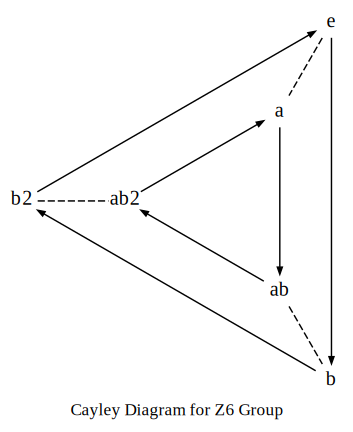

In [ ]:
from graphviz import Digraph

# def Z6_S3(choice='Z6',add_center=False):
#     default_edge_style = dict(arrowhead="normal",arrowsize=".5")
#     g2 = Digraph('G', filename=f'{choice}_group.gv', engine='twopi', format='png',
#               graph_attr=dict(label=f"Cayley Diagram for {choice} Group",
#                               size = "6,6!",
#                               fontsize="12"),
#               node_attr = dict(shape="none",
#                               width=".3", height=".3",
#                               labelfontsize="3",
#                               fixedsize="true"),
#               edge_attr = default_edge_style.copy()#dict(arrowhead="vee",arrowtail="vee")
#               )
#     if add_center:
#        g2.engine='twopi'
#        g2.node('O',style="invis")
#     else:
#        g2.engine='sfdp'
#     g2.node('e',label='<e>')
#     g2.node('b',label='<b>')
#     g2.node('a',label='<a>')
#     g2.node('b2',label='<b<sup>2</sup>>')
#     #Deafult margin 0.11,0.055
#     #g.node('ab2',label='< ab<sup>2</sup>>',margin="0.11,0.055")
#     g2.node('ab2',label='<ab<sup>2</sup>>')
#     g2.node('ab',label='<ab>')
#     #######
#     if add_center:
#         g2.edge('O','a',style="invis")
#         g2.edge('O','ab',style="invis")
#         g2.edge('O','ab2',style="invis")
#     g2.edge('e', 'b')
#     g2.edge('b', 'b2')
#     g2.edge('b2', 'e')
#     g2.edge('e', 'a',style="dashed",dir='none')
#     g2.edge('a', 'ab')
#     g2.edge('ab', 'ab2')
#     g2.edge('ab2', 'a')
#     if choice == 'Z6':
#        g2.edge('b2','ab2',style="dashed", dir='none',)
#        g2.edge('ab','b',style="dashed",dir='none')
#     elif choice == S3:
#       g2.edge('b','ab2',style="dashed", dir='none',)
#       g2.edge('ab','b2',style="dashed",dir='none')
#     else:
#         raise Exception('Choice must be Z6 or S3')
#     return g2

g2 = Z6_S3('Z6',add_center=True)
g2

Again this is just the same graph with a different layout.

## S3 Group

We turn to another group of order 6. In fact, **the** other group of
size 6.

The group pictured below is completely determined by the following equations

$$
\begin{array}[t]{lcl}
a^2 & = & e \\
b^3 & = &e\\
ba & = & ab^2 \\
\end{array}
$$

We noted above that in a 6-element group $ba$ had to be equal
to one of two elements, $ab$ or $ab^2$.  As a consequence,
there are only two 6-element groups, up to isomorphism; ${\mathbf Z6}$ was one. This group, known as S3, is the other.

You should verify that the diagram obeys these equations.  In particular,
tracing the path $ba$ leads to the sample as tracing the path $ab^2$.


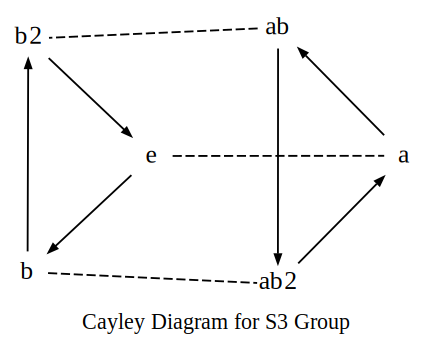

In [ ]:
from graphviz import Digraph

# g3 = Digraph('G', filename='s3_group.gv', engine='sfdp', format='png',
#           graph_attr=dict(label="Cayley Diagram for S3 Group",
#                           size = "6,6!",
#                            fontsize="12"),
#           node_attr = dict(shape="none",
#                            width=".3", height=".3",
#                            labelfontsize="3",
#                            fixedsize="true"),
#           edge_attr = dict(arrowhead="vee",arrowtail="vee")
#           )
# g3.node('e',label='<e>')
# g3.node('b',label='<b>')
# g3.node('a',label='<a>')
# g3.node('b2',label='<b<sup>2</sup>>')
# #Deafult margin 0.11,0.055
# #g.node('ab2',label='< ab<sup>2</sup>>',margin="0.11,0.055")
# g3.node('ab2',label='<ab<sup>2</sup>>')
# g3.node('ab',label='<ab>')
# #######
# g3.edge('e', 'b')
# g3.edge('b', 'b2')
# g3.edge('b2', 'e')
# g3.edge('e', 'a',style="dashed",dir='none')
# g3.edge('a', 'ab')
# g3.edge('ab', 'ab2')
# g3.edge('ab2', 'a')
# g3.edge('b','ab2',style="dashed", dir='none',)
# g3.edge('ab','b2',style="dashed",dir='none')

g3 = Z6_S3('S3')
g3

This group is called S3 because it is
the group of permutations of a set of 3 elements.
That is, there is an isomorphism from the vertices in the diagram
to the permutation group.

**Exercise**:  Once again it is an interesting exercise to spell out
an isomorphism using the structural properties
of the diagram and lining them up with facts about
S3.  As a starting point: Elements that are their own inverses in S3 must be
mapped to elements with that property in the diagram.

As we did above, we can create a `twopi` version. 

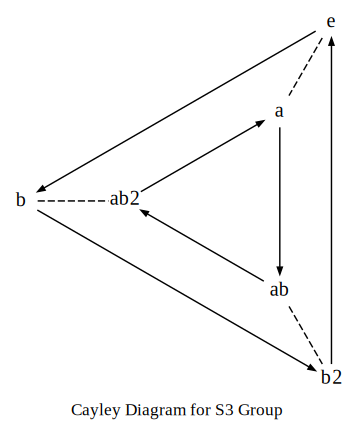

In [ ]:
from graphviz import Digraph

# g4 = Digraph('G', filename='/tmp/s3_group.gv', engine='twopi', format='png',
#           graph_attr=dict(label="Cayley Diagram for S3 Group",
#                           size = "6,6!",
#                            fontsize="12"),
#           node_attr = dict(shape="none",
#                            width=".3", height=".3",
#                            labelfontsize="3",
#                            fixedsize="true"),
#           edge_attr = dict(arrowhead="vee",arrowtail="vee")
#           )
# g4.node('O',style="invis")
# g4.node('e',label='<e>')
# g4.node('b',label='<b>')
# g4.node('a',label='<a>')
# g4.node('b2',label='<b<sup>2</sup>>')
# #Deafult margin 0.11,0.055
# #g.node('ab2',label='< ab<sup>2</sup>>',margin="0.11,0.055")
# g4.node('ab2',label='<ab<sup>2</sup>>')
# g4.node('ab',label='<ab>')
# #######
# g4.edge('O','a',style="invis")
# g4.edge('O','ab',style="invis")
# g4.edge('O','ab2',style="invis")
# g4.edge('e', 'b')
# g4.edge('b', 'b2')
# g4.edge('b2', 'e')
# g4.edge('e', 'a',style="dashed",dir='none')
# g4.edge('a', 'ab')
# g4.edge('ab', 'ab2')
# g4.edge('ab2', 'a')
# g4.edge('b','ab2',style="dashed", dir='none',)
# g4.edge('ab','b2',style="dashed",dir='none')
g4 = Z6_S3('S3', add_center=True)
g4

This is very similar to but different from the Z6 group.  Look carefully at the two `twopi` versions to find the difference.  It  relates directly to the difference in the defining equations. 

With a little more examination it becomes clear that the two graphs differ in a way that isn't just due to the labeling.  In fact, there is no way of relabeling the S3 graph to turn it into the ${\mathbf Z}6$ graph.

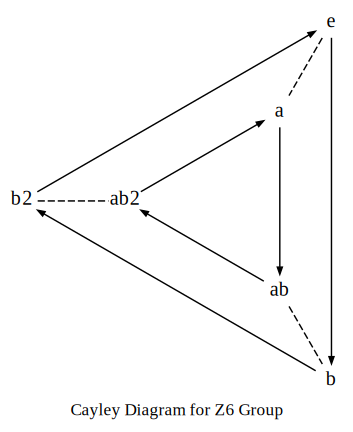

In [ ]:
g2

## D4

In [36]:
from graphviz import Digraph

second_labeling = dict(e='R<sub>0</sub>',b='R<sub>90</sub>',b2='R<sub>180</sub>',b3='R<sub>270</sub>',
                           a = "D'",ab='H',ab2='D',ab3='V')

def D4(add_center=False,labeling=None,tweaking=False):
    if labeling is None:
       tweaking = True
       labeling = dict(e='e',b='b',a='a',b2='b<sup>2</sup>',b3='b<sup>3</sup>',
                    ab='ab',ab2='ab<sup>2</sup>',ab3='ab<sup>3</sup>')
    default_edge_style = dict(arrowhead="normal",arrowsize=".5")
    d4 = Digraph('G', filename='/content/d4_group.gv', engine='sfdp', format='png',
              graph_attr=dict(label="Cayley Diagram for D4 Group",
                              size = "8,8!",
                              fontsize="12"),
              node_attr = dict(shape="none",
                              width=".3", height=".3",
                              #labelfontsize="3",
                              fixedsize="true"),
              edge_attr = default_edge_style.copy()#dict(arrowhead="vee",arrowtail="vee")
              )
    if add_center:
        d4.engine='twopi'
        d4.node('O',style="invis")
    for (k,v) in labeling.items():
      d4.node(k,label=f'<{v}>')
    #d4.node('e',label=f'<{labeling["e"]}>')
    #d4.node('b',label=f'<b>')
    #d4.node('a',label=f'<a>')
    #d4.node('b2',label=f'<b<sup>2</sup>>',fixedsize='false',margin='.1')
    #d4.node('b3',label=f'<b<sup>3</sup>>')
    if tweaking:
      d4.node('b2',label=f'<b<sup>2</sup>>',fixedsize='false',margin='.1')
      d4.node('ab2',label=f'<ab<sup>2</sup>>',fixedsize='false',margin='.1')
      d4.node('ab3',label=f'<ab<sup>3</sup>>',fixedsize='false',margin='.1')
    #######
    if add_center:
        d4.edge('O','e',style="invis")
        d4.edge('O','b',style="invis")
        d4.edge('O','b2',style="invis")
        d4.edge('O','b3',style="invis")
    d4.edge('e', 'b')
    d4.edge('b', 'b2')
    d4.edge('b2', 'b3')
    d4.edge('b3', 'e')
    d4.edge('e', 'a',style="dashed",dir='none')
    d4.edge('a', 'ab')
    d4.edge('ab', 'ab2')
    d4.edge('ab2', 'ab3')
    d4.edge('ab3', 'a')
    d4.edge('b','ab3',style="dashed", dir='none',)
    d4.edge('ab2','b2',style="dashed",dir='none')
    d4.edge('ab','b3',style="dashed",dir='none')
    return d4



In [47]:
import networkx as nx
shortest_path =  nx.algorithms.shortest_paths.generic.shortest_path

def networkx_D4 ():
  import networkx as nx
  G = nx.DiGraph()
  for n in range(0,360,90):
     G.add_edge(f'R{n}', f'R{(n+90)%360}',op_type='b')
  reflections = [ "D'", 'H', 'D', 'V' ]
  rev_reflections = [ "D'", 'V', 'D', 'H' ]
  for (i,n) in enumerate(range(0,360,90)):
     #print(f'R{n}', f'{rev_reflections[i]}')
     G.add_edge(f'R{n}', f'{rev_reflections[i]}',op_type='a')
     G.add_edge(f'{rev_reflections[i]}',f'R{n}',op_type='a')
  for i in range(len(reflections)):
      G.add_edge(f'{reflections[i]}', f'{reflections[(i+1)%4]}',op_type='b')
  return G
     

def networkx_D4_ab ():
  import networkx as nx
  G = nx.DiGraph()
  Rs = ['e','b','b2','b3']
  for i in range(len(Rs)):
     G.add_edge(Rs[i], Rs[(i+1)% 4], op_type='b')
  reflections = [ 'a', 'ab', 'ab2', 'ab3' ]
  rev_reflections = [ 'a', 'ab3', 'ab2', 'ab' ]
  for i in range(len(Rs)):
     #print(f'R{n}', f'{rev_reflections[i]}')
     G.add_edge(Rs[i], rev_reflections[i],op_type='a')
     G.add_edge(rev_reflections[i],Rs[i],op_type='a')
  for i in range(len(reflections)):
      G.add_edge(reflections[i], reflections[(i+1)%4],op_type='b')
  return G

  d4_ab_iso_dict = dict(R0='e',R1='b',R2='b2',R3='b3',
                        a="D'",ab="H",ab2="D",ab3="V")


def compute_op (G,n1,n2,neutral_element='e'):
   """
   This shd work on any Cayley graph.  It uses
   the basic assumption of path consistency.

   unit_tests (G = D4 with symmetry of the square names)

   print(compute_op (G,'V','H'))  # R180
   print(compute_op (G,'V','R180')) # H
   print(compute_op (G,'D','R270')) # H
   print(compute_op (G,"D'",'D'))  # R180
   print(compute_op (G,"R270",'R180'))  # R90
   """
   n2_path = shortest_path(G,neutral_element,n2)
   n2_op_types = get_op_types(G,n2_path)
   return destination_by_op_types (G,n1,n2_op_types)

def get_op_types(G,path):
    return [G[n][path[i+1]]['op_type'] for i,n in enumerate(path[:-1])]

def destination_by_op_types (G,n,op_types):
    next_node,next_edict = n, G[n]
    for ot in op_types:
        for k,v in next_edict.items():
            if v['op_type'] == ot:
               break
        next_node = k
        next_edict = G[k]
    return next_node

nx_G= networkx_D4()
print(compute_op (nx_G,'V','H',neutral_element='R0'))  # R180
print(compute_op (nx_G,'V','R180',neutral_element='R0')) # H
print(compute_op (nx_G,'D','R270',neutral_element='R0')) # H
print(compute_op (nx_G,"D'",'D',neutral_element='R0'))  # R180
print(compute_op (nx_G,"R270",'R180',neutral_element='R0'))  # R90
# Same graph different labelings.
nx_G2 = networkx_D4_ab()
print(compute_op (nx_G2,"b",'b2'))  # b3
print(compute_op (nx_G2,"ab2",'ab2'))  # e
print(compute_op (nx_G2,"ab",'ab2'))  # b

R180
H
H
R180
R90
b3
e
b


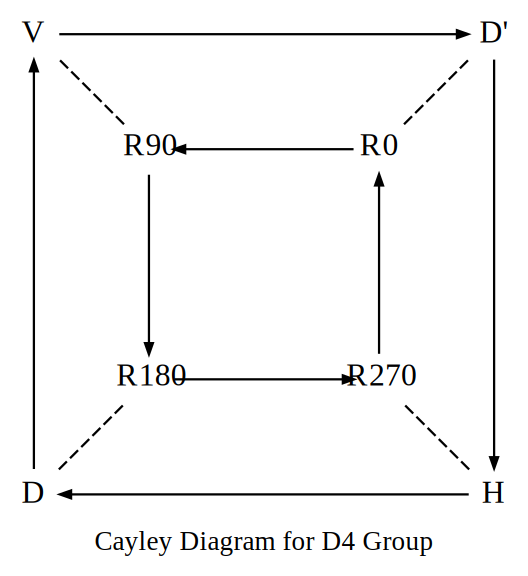

In [45]:
d4 = D4(add_center=True,labeling=second_labeling)
d4

Thees are the equations for D4.

$$
\begin{array}[t]{lcl}
a^2 & = & e \\
b^4 & = &e\\
ba & = & ab^3\\
\end{array}
$$

This is the grpup for symmetries of the square.  It is also called the dihedral group of order 8.  

**Exercise**: Again the isomorphism exercise is interesting.  The usual names for the symmetry operations on a square are:

$$
\begin{array}[t]{llr}
R_{0} & \text{Rotation by } 0^{\circ}\\
R_{90} & \text{Rotation by } 90^{\circ}\\
R_{180} & \text{Rotation by }180^{\circ}\\
R_{270} & \text{Rotation by }270^{\circ}\\
H       & \text{Reflection on Horizontal axis}\\
V       & \text{Reflection on Vertical axis}\\
D      & \text{Reflection on major diagonal axis}\\
D'       & \text{Reflection on 2nd diagonal axis}\\
\end{array}
$$

It is fairly easy to see that
$b$ must be the rotation operation $R$, since $R^4 = e$.  Then $a$ must be some operation which is its own inverse.

Here's another layout of the same graph that makes more obvious
the relationship between S3 and D4.

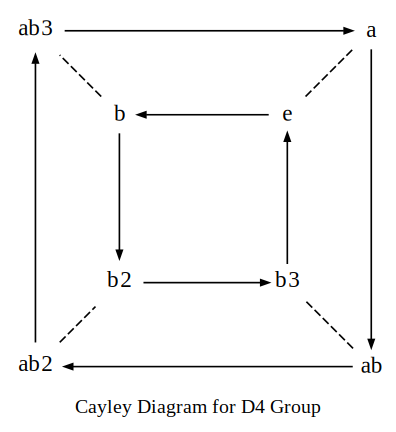

In [ ]:
from graphviz import Digraph
# default_edge_style = dict(arrowhead="normal",arrowsize=".5")
# d4 = Digraph('G', filename='/content/d4_group.gv', engine='twopi', format='png',
#           graph_attr=dict(label="Cayley Diagram for D4 Group",
#                           size = "6,6!",
#                            fontsize="12"),
#           node_attr = dict(shape="none",
#                            width=".3", height=".3",
#                            labelfontsize="3",
#                            fixedsize="true"),
#           edge_attr = default_edge_style.copy()#dict(arrowhead="vee",arrowtail="vee")
#           )
# d4.node('O',style="invis")
# d4.node('e',label='<e>')
# d4.node('b',label='<b>')
# d4.node('a',label='<a>')
# d4.node('b2',label='<b<sup>2</sup>>',fixedsize='false',margin='.1')
# d4.node('b3',label='<b<sup>3</sup>>',fixedsize='false',margin='.2')
# #Deafult margin 0.11,0.055
# #g.node('ab2',label='< ab<sup>2</sup>>',margin="0.11,0.055")
# d4.node('ab2',label='<ab<sup>2</sup>>')
# d4.node('ab3',label='<ab<sup>3</sup>>')
# d4.node('ab',label='<ab>')
# #######
# d4.edge('O','e',style="invis")
# d4.edge('O','b',style="invis")
# d4.edge('O','b2',style="invis")
# d4.edge('O','b3',style="invis")
# d4.edge('e', 'b')
# d4.edge('b', 'b2')
# d4.edge('b2', 'b3')
# d4.edge('b3', 'e')
# d4.edge('e', 'a',style="dashed",dir='none')
# d4.edge('a', 'ab')
# d4.edge('ab', 'ab2')
# d4.edge('ab2', 'ab3')
# d4.edge('ab3', 'a')
# d4.edge('b','ab3',style="dashed", dir='none',)
# d4.edge('ab2','b2',style="dashed",dir='none')
# d4.edge('ab','b3',style="dashed",dir='none')
g5 = D4(add_center=True)
g5

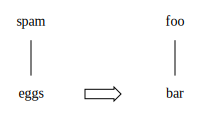

In [ ]:
from graphviz import Graph

#defaults: K =.3,pack=false, engine='dot'
p = Graph(name='parent',node_attr={'shape':'none'},edge_attr={'arrowhead':'vee'},
          graph_attr={'pack': 'false','K':'.3'},engine='dot')
#'LR' is the other option
p.attr(rankdir='TB')
c1 = Graph(name='c1', node_attr={'shape': 'none'})
#c1.node('O1',style='invis',fixedsize='true',width='.5',height='.01',label='')
#c1.edge('spam', 'O1')
#c1.edge('O1', 'eggs')
c1.edge('spam', 'eggs')
p.subgraph(c1)

c2 = Graph(name='c2', node_attr={'shape': 'none'},graph_attr={'K':'.9'})
c2.node('O2',style='invis')
# fixedsize = 'false' (default) label and margin atts determine size
c2.node('arrow', shape='rarrow',label='',fixedsize='true',width='.5',height='.2')
c2.edge('O2','arrow', style='invis')
p.subgraph(c2)

c3 = Graph(name='c3', node_attr={'shape': 'none'})
c3.edge('foo', 'bar')
p.subgraph(c3)
   
p

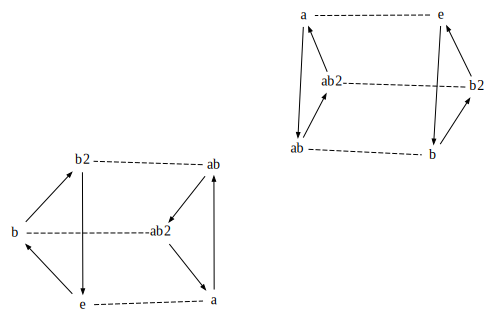

In [ ]:
from graphviz import Graph

def adjoin_two_graphs_with_arrow (G1,G2,engine='dot'):

    #defaults: K =.3,pack=false, engine='dot'
    p =Digraph(name='parent',node_attr={'shape':'none'},
              graph_attr={'pack': 'false','K':'.9','rankdir':'LR'},engine=engine)
    #p.node('0',style='invis',label='',fixedsize='true',width='.5',height='.2')
    #'LR' is the other option
    #p.attr(rankdir='TB')
    p.subgraph(G1)
    #with p.subgraph(name='cluster_0') as c2:
    #  c2.node_attr={'shape': 'none'}
    #  c2.graph_attr={'K':'.9'}
    #  c2.node('O2',style='invis')
    #  # fixedsize = 'false' (default) label and margin atts determine size
    #  c2.node('arrow', shape='rarrow',label='',fixedsize='true',width='.5',height='.2')
    #  c2.edge('O2','arrow', style='invis')
    #p.subgraph(c2)
    #c2 = Graph(name='c2', node_attr={'shape': 'none'},graph_attr={'K':'.9'})
    #c2.node('O2',style='invis')
    # fixedsize = 'false' (default) label and margin atts determine size
    #c2.node('arrow', shape='rarrow',label='',fixedsize='true',width='.5',height='.2')
    #c2.edge('O2','arrow', style='invis')
    #p.subgraph(c2)
    p.subgraph(G2)
    #p.edge('0','2R0')
    #p.edge('0','3R90')
    return p

#R0.engine='osage'
#display(R0) 
#R90.engine='osage'
#display(R90)  
#g2.engine = 'twopi'
#g4.engine='twopi'
adjoin_two_graphs_with_arrow (g4,g2,engine='sfdp')

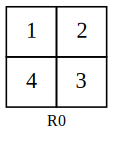

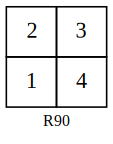

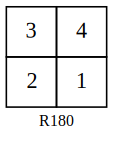

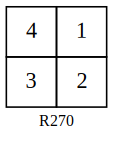

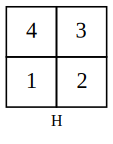

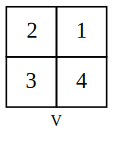

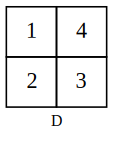

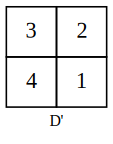

In [ ]:
from graphviz import Graph

def permute_square (permutation, label= 'R0'):
    g = Graph('G', filename='d4_result.gv', engine='patchwork', format='png',
              graph_attr=dict(label=label,
                              size = "2,2!",
                              fontsize="10"),
              node_attr = dict(shape="none",
                              width=".3", height=".3",
                              labelfontsize="4",
                              fixedsize="true")
              )
    n1 = g.node(f'1{label}')
    n2 = g.node(f'2{label}')
    n3 = g.node(f'3{label}')
    n4 = g.node(f'4{label}')
    nodes = '1234'
    g.edge(f'1{label}',f'2{label}')
    g.edge(f'2{label}', f'3{label}')
    g.edge(f'3{label}', f'4{label}')
    g.edge(f'4{label}', f'1{label}')
    for (i,n) in enumerate(nodes):
       g.node(f'{n}{label}', label= permutation[i])
    #g.view()
    return g

R0 = permute_square('1243',label='R0')
display(R0)  
R90 = permute_square('2314',label='R90')
display(R90)  
R180 = permute_square('3421',label='R180')
display(R180) 
R270 = permute_square('4132',label='R270')
display(R270) 
H = permute_square('4312',label='H')
display(H) 
V = permute_square('2134',label='V')
display(V) 
D = permute_square('1423',label='D')
display(D) 
D2 = permute_square('3241',label="D'")
display(D2) 

## Appendix:  Isomorphism from Z6 to diagram


As indicated in the partial answer given above, the neutral element of 
${\mathbf Z}6$ must be mapped to the neutral element in the diagram, $e$.
Similarly, elements of order $m$ must be mapped to elements of order $m$. 

Here are the orders of the elements of Z6:
$$
\left\lbrack
\begin{array}{lc}
  &\text{Order}\\
  \hline
0 & 1\\
1 & 6\\
2 & 3\\
3  & 2\\
4 & 3\\
5 & 6\\
\end{array}
\right\rbrack
$$

To compute the orders of the elements of the diagram,
we use the equations.  For instance

$$
\begin{array}{l|l|l}
(ab)^1 &  ab & ab\\
(ab)^2 & ab \cdot ab = baab = b^2 & b^2\\
(ab)^3 & ab\cdot b^{2} = abb^{2} = a & a\\
(ab)^4  & ab\cdot a  = baa= b & b\\
(ab)^5  & ab \cdot b = abb = ab^2 & ab^2\\
(ab)^6 & ab \cdot ab^{2} = baab^2 = bbb = e & e
\end{array}
$$

In addition to computing the order of
$ab$ (6), this table shows that every group member
can be expressed as a power of $ab$;
it is in this sense that $ab$ **generates** the group.
Because of this higher powers of $ab$
must repeat.  Foir example, $(ab)^7 = ab$, commencing a  new "cycle".  A group
that contains a member whose order is the same
as the order of the group (meaning its powers
enumerate all the members) is called a **cyclic group**.

Reasoning as we did above,
we get the orders of all the elements of the diagram:
$$
\left\lbrack
\begin{array}{lc}
  &\text{Order}\\
  \hline
e & 1\\
ab & 6\\
b & 3\\
a & 2\\
b^2 & 3\\
ab^2 & 6\\
\end{array}
\right\rbrack
$$

That means 3, the only element of order 2, must be mapped to $a$.
The two Z6-elements of order 6 (1 and 5) must
somehow be aligned with the two diagram elements of
order 6 ($ab$ and $ab^2$), while 
2 or 4 must somehow be aligned with $b$ and $b^2$.


Here is a mapping that satisfies the order
constraints:
$$
f =
\left\lbrack
\begin{array}{lcl}
0 & \rightarrow &  e \\
1 & \rightarrow &  ab  \\
2 & \rightarrow &  b \\
3  & \rightarrow &  a \\
4 & \rightarrow &  b^2 \\
5 & \rightarrow &  ab^2 \\
\end{array}
\right\rbrack
$$

Now we  check.  
Let's check $1 + 2$:

$$
\begin{array}[t]{ccccl}
f(1)&\cdot& f(2) &=?&f(1+2)\\
ab &\cdot &b &=?& f(1+2) = f(3) = a
\end{array}
$$
Well, $ab\circ b = ab^2$ certainly does not equal $a$.
So $f$ is not an isomorphism. Let's
try an another mapping that satisfies
the order constraints, 
namely swapping $f(2)$ and $f(4)$.

$$
f =
\left\lbrack
\begin{array}{lcl}
0 & \rightarrow &  e \\
1 & \rightarrow &  ab  \\
2 & \rightarrow &  b^2 \\
3  & \rightarrow &  a \\
4 & \rightarrow &  b \\
5 & \rightarrow &  ab^2 \\
\end{array}
\right\rbrack
$$

Now we check our new $f$:

$$
\begin{array}[t]{cccccccc}
f(1)&\cdot& f(2) &=&f(1+2)\\
ab &\cdot &b^2 &=& f(1+2)& = &f(3) & = &a
\end{array}
$$

This time it works: $ab^2\circ b = ab^3 = a$.  You should check a number of other
cases and see that they "translate":

$$
\begin{array}{c|c}
{\mathbf Z}6 & \text{Diagram}\\
\hline
1 + 1 = 2  & f(1) \cdot f(1) = f(2)\\
2 + 2 = 4 & f(2) \cdot f(2) = f(4)\\
1 + 5 = 0 & f(1) \cdot f(5) = f(0)\\
\end{array}
$$

Finally we said that discovering two elements of
order  6  meant we could draw new Cayley diagrams
for Z6.  Below we give the default diagrams for Z6, which directly represent 
the fact that it is cyclic by defining a link to be multiplication
by one of the members of order 6.

First using $ab$ ($f(1)$) as the generator:


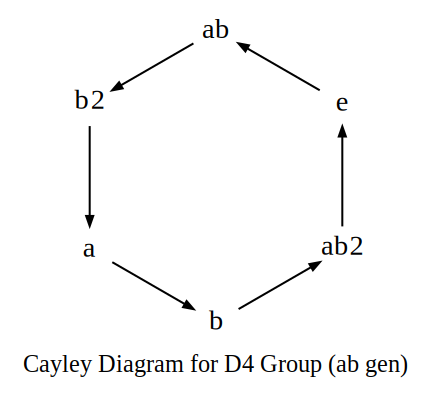

In [ ]:
from graphviz import Digraph

default_edge_style = dict(arrowhead="normal",arrowsize=".5")
z6 = Digraph('G', filename='/content/d4_group.gv', engine='twopi', format='png',
          graph_attr=dict(label="Cayley Diagram for D4 Group (ab gen)",
                          size = "6,6!",
                           fontsize="12"),
          node_attr = dict(shape="none",
                           width=".3", height=".3",
                           labelfontsize="2",  #Has no effect?
                           fixedsize="true"),
          edge_attr = default_edge_style.copy()#dict(arrowhead="vee",arrowtail="vee")
          )
z6.node('O',style="invis")
z6.node('e',label='<e>')
z6.node('ab',label='<ab>')
z6.node('b2',label='<b<sup>2</sup>>')
z6.node('a',label='<a>')
#Deafult margin 0.11,0.055
#g.node('ab2',label='< ab<sup>2</sup>>',margin="0.11,0.055")
z6.node('b',label='<b>')
z6.node('ab2',label='<ab<sup>2</sup>>')
#######
z6.edge('O','e',style="invis")
z6.edge('O','ab',style="invis")
z6.edge('O','b2',style="invis")
z6.edge('O','a',style="invis")
z6.edge('O','b',style="invis")
z6.edge('O','ab2',style="invis")
z6.edge('e', 'ab')
z6.edge('ab', 'b2')
z6.edge('b2', 'a')
z6.edge('a', 'b')
z6.edge('b', 'ab2')
z6.edge('ab2', 'e')

z6

Next using $ab^2$ as the generator:

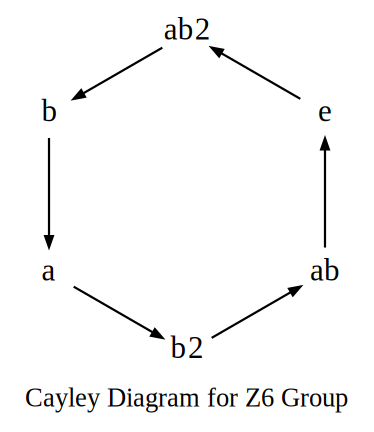

In [ ]:
from graphviz import Digraph

default_edge_style = dict(arrowhead="normal",arrowsize=".5")
z6 = Digraph('G', filename='/content/d4_group.gv', engine='twopi', format='png',
          graph_attr=dict(label="Cayley Diagram for Z6 Group",
                          size = "6,6!",
                           fontsize="12"),
          node_attr = dict(shape="none",
                           width=".3", height=".3",
                           labelfontsize="3",
                           fixedsize="true"),
          edge_attr = default_edge_style.copy()
          )
#Nodes
z6.node('O',style="invis")
z6.node('e',label='<e>')
z6.node('ab2',label='<ab<sup>2</sup>>')
z6.node('b',label='<b>')
z6.node('a',label='<a>')
z6.node('b2',label='<b<sup>2</sup>>')
z6.node('ab',label='ab')
#Edges
z6.edge('O','e',style="invis")
z6.edge('O','ab2',style="invis")
z6.edge('O','b',style="invis")
z6.edge('O','a',style="invis")
z6.edge('O','b2',style="invis")
z6.edge('O','ab',style="invis")
z6.edge('e', 'ab2')
z6.edge('ab2', 'b')
z6.edge('b', 'a')
z6.edge('a', 'b2')
z6.edge('b2', 'ab')
z6.edge('ab', 'e')
z6

The key point respecting Cayley graphs is that these are not simply changes of layout.  Two different graphs
can represent the same group.  For example, in our original graph for
${\mathbf Z}6$, every vertex was incident with three edges.  In this
graph, none is.  The two hexagonal graphs are different too (only one of them has an edge from $b^2$ to $ab$), but the differences are confined to differences of labeling.  In all three graphs, the difference  are based on
using different generators.

## Cayley Graph to Group Operator to Cayley Table

Given that a Cayley graph encodes the operations table of a group,
it makes sense to have functions  that go from the Cayley graph
to operation results, and then to use that to build the tables.  Here is
that code.

In [14]:
"""
It's kind of obvious after writing the code below that
there should be a CayleyTable class (inheriting from nx.DiGraph)

Instance __init__ method should have the following obligatory
args:

   1. neutral_element
   2. a sequence of generators (provides an order for the generators, as
      well as easy sanity checking).
   3. a list of edge lists, one for each generator, in the order of the 
      generators.  generators of order 2 are required to supply 2 edges
      for each undirected edge (n1, n2) and (n2, n1).

__init__ method  should compute operator path table. (currently being done
anew with each call to compute_op).  nodename \mapsto sequence
of generator names (possibly with repetitions). See current def of compute_op
for details.  Much of that computation can become part
of instance initialization. It might be a good idea to
build an operator graph/numpy array (OG) too: OG[n1][gen1] \mapsto n2.

__init__ method should check edge_lists for completeness/coherence:  
Exactly one path of each generator type leaving every node;
exactly one path of each generator type arriving  at every node.

__init__ method should check the operator paths for each generator
are of length 1.

self is an nxDiGraph with additional operator_path_table and neutral_element
attributes. Possibly also operator_graph attribute.



"""

import networkx as nx
shortest_path =  nx.algorithms.shortest_paths.generic.shortest_path

def networkx_D4 ():
  """
  Return a Cayley Graph of D4  with the standard labeling.
  """
  G = nx.DiGraph()
  G.neutral_element = 'R0'
  for n in range(0,360,90):
     G.add_edge(f'R{n}', f'R{(n+90)%360}',op_type='b') 
  reflections = [ "D'", 'H', 'D', 'V' ]
  rev_reflections = [ "D'", 'V', 'D', 'H' ]
  for (i,n) in enumerate(range(0,360,90)):
     #print(f'R{n}', f'{rev_reflections[i]}')
     G.add_edge(f'R{n}', f'{rev_reflections[i]}',op_type='a')
     G.add_edge(f'{rev_reflections[i]}',f'R{n}',op_type='a')
  for i in range(len(reflections)):
      G.add_edge(f'{reflections[i]}', f'{reflections[(i+1)%4]}',op_type='b')
  return G
     

def networkx_D4_ab ():
  """
  Return a Cayley Graph of D4  with the ab labeling.
  """
  G = nx.DiGraph()
  G.neutral_element = 'e'
  Rs = ['e','b','b2','b3']
  for i in range(len(Rs)):
     G.add_edge(Rs[i], Rs[(i+1)% 4], op_type='b')
  reflections = [ 'a', 'ab', 'ab2', 'ab3' ]
  rev_reflections = [ 'a', 'ab3', 'ab2', 'ab' ]
  for i in range(len(Rs)):
     #print(f'R{n}', f'{rev_reflections[i]}')
     G.add_edge(Rs[i], rev_reflections[i],op_type='a')
     G.add_edge(rev_reflections[i],Rs[i],op_type='a')
  for i in range(len(reflections)):
      G.add_edge(reflections[i], reflections[(i+1)%4],op_type='b')
  return G

# Standard symmetry op labels to ab labels
d4_ab_iso_dict = {'R0':'e','R90':'b','R180':'b2','R270':'b3',
                  "D'":'a',"H":'ab',"D":'ab2',"V":'ab3'}

# for testing isomorphism checker
bad_d4_ab_iso_dict = {'R0':'e','R90':'b','R180':'b2','R270':'b3',
                      "D'":'a',"H":'ab2',"D":'ab',"V":'ab3'}


def compute_op (G,n1,n2,op_type='op_type'):
   """
   This shd work on any Cayley graph.  It uses
   the basic Cayley graph assumption of path consistency,
   returns the result of n1 OP n2 in the group
   represented by G.

   unit_tests (G = D4 with symmetry of the square names)

   print(compute_op (G,'V','H'))  # R180
   print(compute_op (G,'V','R180')) # H
   print(compute_op (G,'D','R270')) # H
   print(compute_op (G,"D'",'D'))  # R180
   print(compute_op (G,"R270",'R180'))  # R90

   The assumption is that edges have different types,
   encoded in the edge attribute C{op_type}.

   There is also the Cayley graph assumption that
   there is only one edge of any given type leaving
   any given node.
   """
   try:
      neutral_element = G.neutral_element
   except AttributeError as e:
     print('G is not a Cayley Graph. Must have neutral_element attribute')
     raise e
      
   #print(neutral_element,n1,n2)
   n2_path = shortest_path(G,neutral_element,n2)
   n2_op_types = get_op_types(G,n2_path,op_type=op_type)
   return destination_by_op_types (G,n1,n2_op_types,op_type=op_type)

def get_op_types(G,path,op_type='op_type'):
    return [G[n][path[i+1]]['op_type'] for i,n in enumerate(path[:-1])]

def destination_by_op_types (G,n,op_types,op_type='op_type'):
    next_node,next_edict = n, G[n]
    for ot in op_types:
        for k,v in next_edict.items():
            if v[op_type] == ot:
               break
        next_node = k
        next_edict = G[k]
    return next_node

nx_sym = networkx_D4()
print(compute_op (nx_sym,'V','H'))  # R180
print(compute_op (nx_sym,'V','R180')) # H
print(compute_op (nx_sym,'D','R270')) # H
print(compute_op (nx_sym,"D'",'D'))  # R180
print(compute_op (nx_sym,"R270",'R180'))  # R90
# Same graph different labelings.
nx_ab = networkx_D4_ab()
print(compute_op (nx_ab,"b",'b2'))  # b3
print(compute_op (nx_ab,"ab2",'ab2'))  # e
print(compute_op (nx_ab,"ab",'ab2'))  # b

R180
H
H
R180
R90
b3
e
b


## Checking isomorphism systermatically

The following code implements a more systematic approach to checking isomorphisms.  

It turns out there is more than one valid isomorphism.

The other constraint has to do with capturing the important
fact that

$$
1 + 1 = 2
$$

Because they
involve the mapping to 1 and 2,
the choices undetermined by order are linked.  Recall that since there are two elements of order 6 in bioth the the diagram and Z6, either

$$
f(abb) = 1 \text{ or } f(ab) = 1.
$$

And whichever of the two wasn't 1 needed to be 5.

Similarly, there are two elements of order 3 in both groups, so

$$
f(bb) = 2 \text{ or } f(b) = 2.
$$

And whichever of the two wasn't 2 needed to be 4.
Two independent binary choices gives 4 possibilities,
except that in this case they're not independent.

Since $abb\circ abb = b$, then
if $f(abb)$ is 1, $f(b)$ has to be 2.  That is, we must have

$$
\begin{array}[t]{ccccccc}
f(abb) &+ &f(abb) & = & f(abb\circ abb)&  = & f (b)\\
1 & + & 1 & = & & & 2
\end{array}
$$
on the other hand,
since $ab\circ ab$ is $bb$, then
if $ab$ is 1, $bb$ has to be 2.

The moral of the story is that checking isomorphisms
bottom up, item by item, is hard work.

In principle, there is no substitute for checking that
the Cayley tables of the two groups are synchronized
by the isomorphism, cell by cell.  The following code
takes this route, but a substitutes a function
for the complete Cayley table of the diagram; this is not hard since the diagram group is Abelian, and we know the order of $a$ and $b$.

A visually workable solution (`check_iso_visually`) is demoed;
this prints out
the Z6-addition table induced by the mapping from the
diagram. The user is warned if there is
an error, an example error is shown,
and the entie table is printed.
It is fairly easy to see the errors there.

In [60]:
from string import ascii_lowercase
from string import digits
from nltk import FreqDist
from functools import reduce
import numpy as np
import operator


def add_expr_abelian(x,y,ZTuple):
    return simplify_expr_abelian(x+y,ZTuple)

def modulate_expr_rep(rep,alph_mod):
    for (x,ct) in rep.items():
         rep[x] = ct%alph_mod[x]
  
def simplify_expr_abelian (expr, ZTuple):
    """
    This function substitutes for a Cayley table 
    in a simple case.

    ZTuple is a sequence of integers giving
    the group order of each generator as determined by alphabetical 
    oder of the generators: Its value is (2,3) if there are
    2 generators and a has order 2 and b has order 3.

    THis only works for Abelian grouups
    following the ab notation conventions, e.g.,
    those isomorphic to Zn or Cartesian 
    products of Zn.  Simplification just
    aint simple in the non-Abelian case.
    Essentially we can concatenate expressions,
    count the resulting generator tokens ( a's,b's, etc.), since adjacency 
    doesnt matter, and
    use the mod function to cancel out excess generator tokens.
    If b has order 3, than an expression with 4 b's simplifies
    to one with 1 b.

    a^2b^3 may come in as a2b3 or aabbb. If present,  the exponent follows
    the element it applies to. Otherwise order doesnt matter.
    """
    global rep, alph_mod
    alph_mod = dict(zip(ascii_lowercase, ZTuple))
    alph_mod['e'] = 1#
    res,limit = [],len(expr) - 1
    for i in range(len(expr)):
        x = expr[i]
        if x in digits:
          continue
        elif i < limit and expr[i+1] in digits:
          fac = int(expr[i+1])
        else:
          fac = 1
        res.append(x*fac)
    rep = FreqDist(''.join(res))
    modulate_expr_rep(rep, alph_mod)
    final = ''.join(sorted([x*(ct) if ct else '' for (x,ct) in rep.items()]))
    return (final if final else 'e')
     

def make_op_table(elements, op, dtype=int):
    N = len(elements)
    table = np.zeros((N,N),dtype=dtype)
    for i in range(N):
        for j in range(N):
            table[i,j] = op(elements[i],elements[j])
    return table

def print_op_table (T, op = None):

    def print_row (vals):
        for v in vals[:-1]:
            print(f'{v:>2.0f} ',end=' ')
        #print('|')
        print(f'{vals[-1]:>2.0f} ',end=' |\n')

    def print_header_sep(c):
        print(f' {"---":<{3}s}+', end='')
        print('-'*((c*4)+1),'+',sep='')

    r,c = T.shape
    if op:
        print(op.__name__)
    else:
        print()
    print(f' {" ":<{3}s} | ', end='')
    for i in range(c):
        print(f'{i:>2d} ',end=' ')
    print()
    print_header_sep(c)
    for i in range(r):
        print(f' {i:<2d} | ', end='')
        print_row(T[i,:])
        print_header_sep(c)

def print_nonint_op_table (T, op = None):
    """
    Not Done yet,  Contains definition of
    print_op_table for ints.
    """
    elems = T[0]
    max_width = max([len(x) for x in elems])
    r,c = T.shape
    def print_row (vals):
        for v in vals[:-1]:
            print(f'{v:^{max_width}s} ',end=' ')
        #print('|')
        print(f'{vals[-1]:^{max_width}s} ',end=' |\n')

    def print_header_sep(c):
        #print(f' {"---":<{max_width}s}+', end='')
        print(f"{('-'*max_width):s}-+",end='')
        print('-'*((c*(max_width+2))+1),'+',sep='')

    if op:
        print(op.__name__)
    else:
        print()
    print(f' {" ":<{max_width}s}| ', end='')
    for i in range(c):
        print(f'{elems[i]:^{max_width}s} ',end=' ')
    print()
    print_header_sep(c)
    for i in range(r):
        print(f' {elems[i]:<{max_width}s}| ', end='')
        print_row(T[i,:])
        print_header_sep(c)

def check_iso(domain_op, range_op, iso_dict, verbose=0):
  """
  For example::
 
    M = reduce(operator.mul,ZTuple)
    range_op = lambda i,j: (i+j) %M
    domain_op = lambda x,y: range_op(x,y,ZTuple)

  """
  valid = True
  for x in iso_dict:
      #print('x',x)
      for y in iso_dict:
          #print('   y',y)
          # Op on ab side
          range_val = range_op(iso_dict[x],iso_dict[y])
          # Op on zn side
          domain_val = domain_op(x,y)
          mapped_x,mapped_y,mapped_domain_val = [iso_dict[val] for val in (x,y,domain_val)]
          valid = (range_val == mapped_domain_val)
          if verbose:
            if verbose == 2 or not valid:
               print(x,mapped_x,y,mapped_y, domain_val,mapped_domain_val, range_val, valid)
          if not valid:
            return valid
  return valid

def check_iso_visually(domain_op, iso_dict, ZTuple, validity_check=True):
  """
  This prints out the Z6-addition table induced by the mapping from the
  diagram. A warning is printed if there is an error, an example error is shown,
  and the entire table is printed. It is fairly easy to see the errors there.

  domain_op is the op in the diagram group, which works on a's & b's.
  """
  rev_iso_dict = dict((y,x) for (x,y) in iso_dict.items())
  N = reduce(operator.mul,ZTuple)
  ab_op = lambda x,y: iso_dict[domain_op(rev_iso_dict[x],rev_iso_dict[y],ZTuple)]
  T = make_op_table(range(N), ab_op)
  if validity_check:
      print()
      valid = check_iso(domain_op, iso_dict, ZTuple, verbose=1)
      if not valid:
          print('**There are errors in the table!**')
          print()
  print_op_table(T,op=domain_op)
  return T


In [46]:
M = 6
zn_op = lambda x, y: (x + y) % M
T = make_op_table(range(6),zn_op)
print_op_table(T)


     |  0   1   2   3   4   5  
 ---+-------------------------+
 0  |  0   1   2   3   4   5  |
 ---+-------------------------+
 1  |  1   2   3   4   5   0  |
 ---+-------------------------+
 2  |  2   3   4   5   0   1  |
 ---+-------------------------+
 3  |  3   4   5   0   1   2  |
 ---+-------------------------+
 4  |  4   5   0   1   2   3  |
 ---+-------------------------+
 5  |  5   0   1   2   3   4  |
 ---+-------------------------+


In [67]:


ZTuple = (2,3)
M = reduce(operator.mul,ZTuple)
mod_add_op = lambda x,y: operator.add(x,y)% M
z6table = make_op_table(range(6),mod_add_op)
good_iso_dict = dict(e=0,ab=1,bb=2,a=3,b=4,abb=5)
bad_iso_dict1 = dict(e=0,abb=1,bb=2,a=3,b=4,ab=5)
bad_iso_dict2 = dict(e=0,ab=1,b =2,a=3,bb=4,abb=5)
good_iso_dict2 = dict(e=0,abb=1,b =2,a=3,bb=4,ab=5)
#check_iso(domain_op, range_op, iso_dict)
#range_op
ab_op = lambda x,y: add_expr_abelian(x,y,ZTuple)
M = reduce(operator.mul,ZTuple)
#domain_op
zn_op = lambda i,j: (i+j) %M

ab_table = make_op_table(list(good_iso_dict.keys()),ab_op,dtype=object)


#result1 = check_iso(add_expr_abelian, good_iso_dict, ZTuple,verbose=False)
result1 = check_iso(ab_op, zn_op, good_iso_dict, verbose=False)
print(1,result1)
print()
# We detect the two flawed isomorphisms
result2 = check_iso(ab_op, zn_op, bad_iso_dict1, verbose=2)
#result2 = check_iso(add_expr_abelian, bad_iso_dict1, ZTuple,verbose=2)
print(2,result2)
print()
result3 = check_iso(ab_op, zn_op, bad_iso_dict2, verbose=2)
#result3 = check_iso(add_expr_abelian, bad_iso_dict2, ZTuple,verbose=2)
print(3,result3)
print()
result4 = check_iso(ab_op, zn_op, good_iso_dict2, verbose=False)
#result4 = check_iso(add_expr_abelian, good_iso_dict2, ZTuple,verbose=False)
print(4,result4)


print(ab_table)
print()
############# D4 ####################################
#
def d4_ab_op (x,y): return compute_op (nx_ab, x, y)
#
def d4_sym_op (x,y): return compute_op (nx_sym, x, y)
#######################################################

######## D4 ab<->sym isomorphism ####################################
result5 = check_iso(d4_sym_op,d4_ab_op, d4_ab_iso_dict,verbose=False)
print(5,result5)
result6 = check_iso(d4_sym_op,d4_ab_op, bad_d4_ab_iso_dict,verbose=2)
print(6,result6)

######## D4 print op tables ####################################
d4_sym_table = make_op_table(list(d4_ab_iso_dict.keys()), domain_op, dtype=object)
print_nonint_op_table (d4_sym_table, op = d4_sym_op)
d4_ab_table = make_op_table(list(d4_ab_iso_dict.values()), range_op, dtype=object)
print_nonint_op_table (d4_ab_table, op = d4_ab_op)

1 True

e 0 e 0 e 0 0 True
e 0 abb 1 abb 1 1 True
e 0 bb 2 bb 2 2 True
e 0 a 3 a 3 3 True
e 0 b 4 b 4 4 True
e 0 ab 5 ab 5 5 True
abb 1 e 0 abb 1 1 True
abb 1 abb 1 b 4 2 False
2 False

e 0 e 0 e 0 0 True
e 0 ab 1 ab 1 1 True
e 0 b 2 b 2 2 True
e 0 a 3 a 3 3 True
e 0 bb 4 bb 4 4 True
e 0 abb 5 abb 5 5 True
ab 1 e 0 ab 1 1 True
ab 1 ab 1 bb 4 2 False
3 False

4 True
[['e' 'ab' 'bb' 'a' 'b' 'abb']
 ['ab' 'bb' 'a' 'b' 'abb' 'e']
 ['bb' 'a' 'b' 'abb' 'e' 'ab']
 ['a' 'b' 'abb' 'e' 'ab' 'bb']
 ['b' 'abb' 'e' 'ab' 'bb' 'a']
 ['abb' 'e' 'ab' 'bb' 'a' 'b']]

5 True
R0 e R0 e R0 e e True
R0 e R90 b R90 b b True
R0 e R180 b2 R180 b2 b2 True
R0 e R270 b3 R270 b3 b3 True
R0 e D' a D' a a True
R0 e H ab2 H ab2 ab2 True
R0 e D ab D ab ab True
R0 e V ab3 V ab3 ab3 True
R90 b R0 e R90 b b True
R90 b R90 b R180 b2 b2 True
R90 b R180 b2 R270 b3 b3 True
R90 b R270 b3 R0 e e True
R90 b D' a V ab3 ab3 True
R90 b H ab2 D' a ab False
6 False
d4_sym_op
     |  R0   R90   R180  R270   D'    H     D     V    
--

In [61]:
print_nonint_op_table (d4_ab_table, op = range_op)

<lambda>
    |  e    b   b2   b3    a   ab   ab2  ab3  
----+-----------------------------------------+
 e  |  e    b   b2   b3    a   ab   ab2  ab3  |
----+-----------------------------------------+
 b  |  b   b2   b3    e   ab3   a   ab   ab2  |
----+-----------------------------------------+
 b2 | b2   b3    e    b   ab2  ab3   a   ab   |
----+-----------------------------------------+
 b3 | b3    e    b   b2   ab   ab2  ab3   a   |
----+-----------------------------------------+
 a  |  a   ab   ab2  ab3   e    b   b2   b3   |
----+-----------------------------------------+
 ab | ab   ab2  ab3   a   b3    e    b   b2   |
----+-----------------------------------------+
 ab2| ab2  ab3   a   ab   b2   b3    e    b   |
----+-----------------------------------------+
 ab3| ab3   a   ab   ab2   b   b2   b3    e   |
----+-----------------------------------------+


In [62]:
print_nonint_op_table (d4_sym_table, op = domain_op)

<lambda>
     |  R0   R90   R180  R270   D'    H     D     V    
-----+-------------------------------------------------+
 R0  |  R0   R90   R180  R270   D'    H     D     V    |
-----+-------------------------------------------------+
 R90 | R90   R180  R270   R0    V     D'    H     D    |
-----+-------------------------------------------------+
 R180| R180  R270   R0   R90    D     V     D'    H    |
-----+-------------------------------------------------+
 R270| R270   R0   R90   R180   H     D     V     D'   |
-----+-------------------------------------------------+
 D'  |  D'    H     D     V     R0   R90   R180  R270  |
-----+-------------------------------------------------+
 H   |  H     D     V     D'   R270   R0   R90   R180  |
-----+-------------------------------------------------+
 D   |  D     V     D'    H    R180  R270   R0   R90   |
-----+-------------------------------------------------+
 V   |  V     D'    H     D    R90   R180  R270   R0   |
-----+-----------------

## Appendix: saving image files

The primary idea was to save files
so that we could display them side by
side in an HTML table.  Didnt work,

So the file saving does work, as the code below
shows, but the HTMl image display in the notebook fails.

The next cells currently have no use case.

For saving image fikles use render as in the next cell.

Filename arg of render is for the DOT file.  format is the image format (png, etc.)  renderer is the display backend (cairo or gd).  So two files are created,
a dot file and an image file (.png for example).

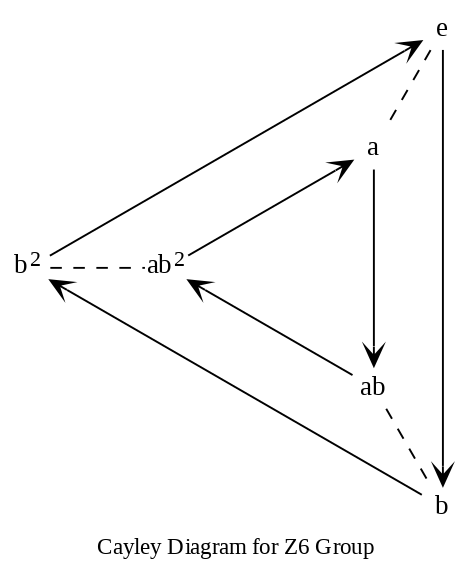

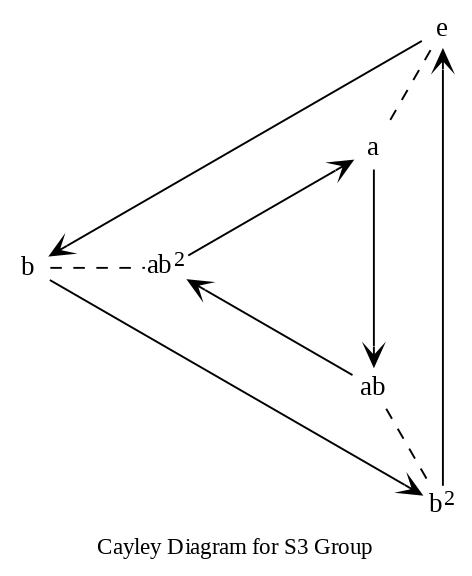

In [ ]:
g2.render(filename='/content/g2.dot',format='png')
g4.render(filename='/content/g4.dot',format='png')#,formatter='cairo',renderer='cairo') ==> image file = '/content/g5.dot.cairo.cairo.png'
display(Image(filename='/content/g2.dot.png'), Image(filename='/content/g4.dot.png'))

Attempting to display the two images side by side in an HTML table.

Doesnt work.  Apparently becauese modern browsers. don't like file://

In [ ]:
#HTML("<table><tr><td><img src='file://content/g2.png'></img></td><td><img src='file://content/g4.png'></img></td></tr></table>")
HTML("<img src='file:///content/g4.png'></img>")